In [9]:
# Import Required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
#importing the libarries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Loading and examining the dataset

In [10]:
#load dataset in csv to pandas dataframe
df =pd.read_csv('/content/dataset.csv', delimiter=";")

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [12]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [13]:
df.isna().sum() #check for missing values

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [14]:
#checking the duplcate rows
df.duplicated().sum()

0

In [15]:
#!pip install ydata_profiling

In [16]:
#from ydata_profiling import ProfileReport
#profile= ProfileReport(df, title="student Report")
#profile.to_file(output_file="student_report.html")

In [17]:
#displaying the report
#profile.to_notebook_iframe()

In [18]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [19]:
df['Marital status'].unique()

array([1, 2, 4, 3, 5, 6])

In [20]:
df['Application mode'].unique()

array([17, 15,  1, 39, 18, 53, 44, 51, 43,  7, 42, 16,  5,  2, 10, 57, 26,
       27])

In [21]:
df['Application order'].unique()

array([5, 1, 2, 4, 3, 6, 9, 0])

In [22]:
df['Course'].unique()

array([ 171, 9254, 9070, 9773, 8014, 9991, 9500, 9238, 9670, 9853, 9085,
       9130, 9556, 9147, 9003,   33, 9119])

In [23]:
df['Previous qualification'].unique()

array([ 1, 19, 42, 39, 10,  3, 40,  2,  4, 12, 43, 15,  6,  9, 38,  5, 14])

In [24]:
df['Nacionality'].unique()

array([  1,  62,   6,  41,  26, 103,  13,  25,  21, 101,  11,  22,  32,
       100,  24, 109,   2, 108, 105,  14,  17])

In [25]:
df['Previous qualification (grade)'].unique()

array([122. , 160. , 100. , 133.1, 142. , 119. , 137. , 138. , 139. ,
       136. , 133. , 110. , 149. , 127. , 135. , 140. , 125. , 126. ,
       151. , 115. , 150. , 143. , 130. , 120. , 103. , 154. , 132. ,
       167. , 129. , 141. , 116. , 148. , 118. , 106. , 121. , 114. ,
       124. , 123. , 113. , 111. , 131. , 158. , 146. , 117. , 153. ,
       178. ,  99. , 134. , 128. , 170. , 155. , 145. , 152. , 112. ,
       107. , 156. , 188. ,  96. , 161. , 166. , 147. , 144. , 102. ,
       101. , 180. , 172. , 105. , 108. , 165. , 190. , 162. , 164. ,
       163. , 159. , 117.4, 175. , 133.8, 176. , 168. , 139.3,  97. ,
       157. , 140.8, 184.4, 148.9, 109. , 174. , 182. , 138.6,  95. ,
       154.4, 163.3, 145.7, 123.9, 124.4, 169. , 177. , 138.7, 119.1,
       118.9, 126.6])

In [26]:
df['Daytime/evening attendance\t'].unique()

array([1, 0])

In [27]:
df["Mother's qualification"].unique()

array([19,  1, 37, 38,  3,  4, 42,  2, 34, 12, 40,  9,  5, 39, 11, 41, 30,
       14, 35, 36,  6, 10, 29, 43, 18, 22, 27, 26, 44])

In [28]:
df["Father's qualification"].unique()

array([12,  3, 37, 38,  1, 19,  5,  4, 34,  2, 39, 11,  9, 36, 26, 40, 14,
       20, 35, 41, 22, 13, 29, 43, 18, 42, 10,  6, 30, 25, 44, 33, 27, 31])

In [29]:
df["Mother's occupation"].unique()

array([  5,   3,   9,   7,   4,   1, 125,   0,   6,   2,  90,   8, 141,
       175,  99, 191, 151, 194, 192, 132, 152, 134,  10, 143, 123, 173,
       193, 122, 144, 131, 171, 153])

In [30]:
df["Father's occupation"].unique()

array([  9,   3,   7,  10,   5,   8,   4,   1,   2, 124,   6,   0,  90,
       175, 121,  99, 144, 195, 192, 161, 193, 151, 182, 132, 131, 194,
       163, 135, 143, 171, 103, 172, 152, 183, 122, 102, 181, 134, 123,
       112, 153, 174, 141, 114, 101, 154])

In [31]:
df['Admission grade'].unique()

array([127.3, 142.5, 124.8, 119.6, 141.5, 114.8, 128.4, 113.1, 129.3,
       123. , 130.6, 119.3, 130.2, 111.8, 137.1, 120.7, 137.4, 136.3,
       124.6, 120.3, 121.8, 125.5, 114.9, 123.9, 157. , 116.4, 131. ,
       122.1, 118.8, 150. , 130. , 138.8, 134.5, 131.4, 102.5, 128.8,
       122.9, 113.9, 120. , 121.1, 120.4, 100.6, 121.4, 109.7, 134.1,
       127.6, 132.4, 133.4, 126.1, 113.5, 121.3, 159.3, 129.1, 155.3,
       139.8, 115.2, 131.9, 126. , 120.9, 128.2, 120.1, 100. , 134. ,
       130.8, 135.8, 111.7, 132.9, 115.5, 106. , 117. , 110.2, 155.7,
       180.4, 110. , 161. , 117.6, 128.7, 112.2, 100.8, 105. , 114. ,
       137. , 124.9, 134.3, 111.5, 160. , 117.4, 122.2, 118.2, 106.7,
       108.2, 107. , 136.1, 115.3, 140.4, 113.4, 118.6, 122.3, 127.9,
       117.1, 145.3, 122.6, 128. , 123.7, 131.7, 133.2, 109.3, 113. ,
       157.9, 112.1, 174.7, 110.1,  99.7, 121. , 119.1, 124.7, 117.2,
       131.5, 121.7, 123.4, 132.8, 108.7, 138.1, 126.5, 127.4, 123.6,
       122. , 125.8,

In [32]:
df['Displaced'].unique()

array([1, 0])

In [33]:
df['Educational special needs'].unique()

array([0, 1])

In [34]:
df['Debtor'].unique()

array([0, 1])

In [35]:
df['Tuition fees up to date'].unique()

array([1, 0])

In [36]:
df['Gender'].unique()

array([1, 0])

In [37]:
df['Scholarship holder'].unique()

array([0, 1])

In [38]:
df['Age at enrollment'].unique()

array([20, 19, 45, 50, 18, 22, 21, 34, 37, 43, 55, 39, 29, 24, 27, 23, 26,
       33, 35, 25, 44, 36, 47, 28, 38, 30, 31, 32, 40, 42, 48, 49, 46, 41,
       70, 60, 53, 51, 52, 54, 61, 58, 59, 17, 57, 62])

In [39]:
df['International'].unique()

array([0, 1])

In [40]:
df['Curricular units 1st sem (credited)'].unique()

array([ 0,  2,  3,  6,  7, 13,  4,  1,  5, 19, 11,  8, 10,  9, 15, 12, 14,
       18, 17, 16, 20])

In [41]:
df['Curricular units 1st sem (enrolled)'].unique()

array([ 0,  6,  5,  7,  8,  1, 12, 10, 18,  9, 21,  3, 17, 16, 11, 14, 13,
        2,  4, 15, 19, 23, 26])

In [42]:
df['Curricular units 1st sem (evaluations)'].unique()

array([ 0,  6,  8,  9, 10,  5,  7, 14, 12, 15, 13, 11,  1, 17, 18, 19, 21,
        4, 16,  3, 24,  2, 22, 45, 20, 26, 29, 36, 32, 23, 27, 31, 28, 25,
       33])

In [43]:
df['Curricular units 1st sem (approved)'].unique()

array([ 0,  6,  5,  7,  4,  1,  3,  2,  8, 18, 10,  9, 21, 11, 13, 12, 16,
       14, 17, 19, 15, 20, 26])

In [44]:
df['Curricular units 1st sem (grade)'].unique()

array([ 0.        , 14.        , 13.42857143, 12.33333333, 11.85714286,
       13.3       , 13.875     , 11.4       , 13.21428571, 10.57142857,
       13.25      , 13.2       , 12.        , 13.30625   , 12.5       ,
       11.66666667, 11.4375    , 12.85714286, 13.375     , 13.29666667,
       11.6       , 11.375     , 12.66666667, 12.93333333, 12.83333333,
       11.33333333, 12.4       , 10.        , 11.        , 12.75      ,
       14.8       , 13.928     , 13.        , 11.5       , 13.51666667,
       13.66666667, 11.83333333, 14.71428571, 10.6       , 13.04444444,
       14.935     , 13.13333333, 11.9       , 12.57142857, 11.2       ,
       11.975     , 10.33333333, 10.5       , 14.84285714, 12.2       ,
       12.16666667, 13.08      , 10.66666667, 11.875     , 13.75      ,
       14.2       , 11.96      , 12.875     , 14.63157895, 13.26666667,
       13.85714286, 13.4       , 12.51666667, 11.61666667, 13.14285714,
       12.6       , 10.8       , 12.8       , 14.16666667, 12.1 

In [45]:
df['Curricular units 1st sem (without evaluations)'].unique()

array([ 0,  1,  2,  4,  3,  6, 12, 10,  7,  5,  8])

In [46]:
df['Curricular units 2nd sem (credited)'].unique()

array([ 0,  1,  2,  5,  7,  4, 10,  3, 13,  9,  6, 11, 12,  8, 14, 15, 16,
       18, 19])

In [47]:
df['Curricular units 2nd sem (enrolled)'].unique()

array([ 0,  6,  5,  8,  7, 11, 12,  9, 13, 19,  3, 10,  4, 17,  2,  1, 14,
       15, 16, 23, 18, 21])

In [48]:
df['Curricular units 2nd sem (evaluations)'].unique()


array([ 0,  6, 10, 17,  8,  5,  7, 14,  9, 12, 11, 13, 19,  3, 15, 16,  4,
       18,  2, 21,  1, 26, 27, 22, 20, 24, 28, 23, 25, 33])

In [49]:
df['Curricular units 2nd sem (approved)'].unique()

array([ 0,  6,  5,  8,  2,  7,  4,  1,  3, 10, 13, 11, 19,  9, 12, 17, 14,
       20, 16, 18])

In [50]:
df['Curricular units 2nd sem (grade)'].unique()

array([ 0.        , 13.66666667, 12.4       , 13.        , 11.5       ,
       14.345     , 14.14285714, 13.5       , 14.2       , 13.21428571,
       11.        , 12.        , 14.545     , 12.25      , 11.425     ,
       12.85714286, 12.28571429, 14.11428571, 13.28571429, 12.33333333,
       13.71666667, 10.57142857, 13.4       , 14.375     , 13.42857143,
       10.        , 11.6       , 15.8       , 14.34285714, 13.8       ,
       14.33333333, 13.2       , 13.77142857, 12.83333333, 14.16666667,
       11.83333333, 13.595     , 12.9       , 14.935     , 12.22142857,
       12.42857143, 10.75      , 10.8       , 13.75      , 10.85714286,
       13.33333333, 15.05555556, 11.66666667, 12.2       , 13.3       ,
       11.33333333, 13.08      , 11.2       , 13.25      , 14.47777778,
       14.23076923, 12.27272727, 12.3       , 15.        , 12.8       ,
       12.57142857, 12.51666667, 10.66666667, 11.4       , 14.        ,
       11.25      , 13.77777778, 15.01111111, 13.74285714, 14.6 

In [51]:
df['Curricular units 2nd sem (without evaluations)'].unique()

array([ 0,  5,  2,  1,  3,  6,  4, 12,  7,  8])

In [52]:
df['Unemployment rate'].unique()

array([10.8, 13.9,  9.4, 16.2, 15.5,  8.9, 12.7, 11.1,  7.6, 12.4])

In [53]:
df['Inflation rate'].unique()

array([ 1.4, -0.3, -0.8,  0.3,  2.8,  3.7,  0.6,  2.6,  0.5])

In [54]:
df['GDP'].unique()

array([ 1.74,  0.79, -3.12, -0.92, -4.06,  3.51, -1.7 ,  2.02,  0.32,
        1.79])

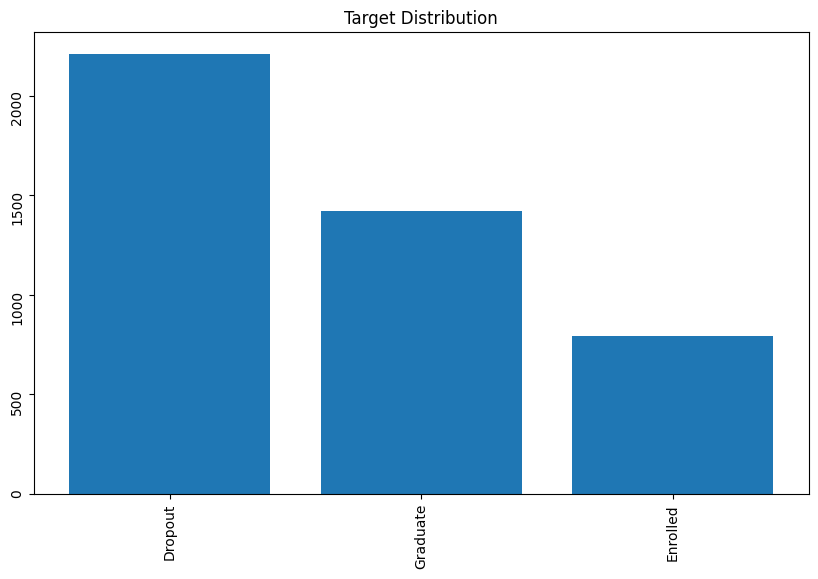

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['Target'].unique(),df['Target'].value_counts())
V=plt.xticks(rotation=90)
v=plt.yticks(rotation=90)
plt.title('Target Distribution')
plt.show()

In [56]:
df.shape

(4424, 37)

In [57]:
#Hypothesis on the Target variable
from scipy import stats

# Subset the data based on target (Dropout, Enrolled, Graduate)
dropout = df[df['Target'] == 'Dropout']
graduate = df[df['Target'] == 'Graduate']
enrolled = df[df['Target'] == 'Enrolled']


# Perform ANOVA for GDP, Inflation, and Unemployment
f_val, p_val = stats.f_oneway(dropout['GDP'], graduate['GDP'], enrolled['GDP'])
print(f"ANOVA for GDP: F-value = {f_val}, p-value = {p_val}")

f_val, p_val = stats.f_oneway(dropout['Inflation rate'], graduate['Inflation rate'], enrolled['Inflation rate'])
print(f"ANOVA for Inflation: F-value = {f_val}, p-value = {p_val}")

f_val, p_val = stats.f_oneway(dropout['Unemployment rate'], graduate['Unemployment rate'], enrolled['Unemployment rate'])
print(f"ANOVA for Unemployment: F-value = {f_val}, p-value = {p_val}")

from scipy import stats
# Combine Graduate and Enrolled into one group
non_dropout = df[df['Target'] != 'Dropout']

# Perform a t-test for Admission Grade
t_val, p_val = stats.ttest_ind(dropout['Admission grade'], non_dropout['Admission grade'], equal_var=False)
print(f"T-test for Admission Grade: T-value = {t_val}, p-value = {p_val}")

ANOVA for GDP: F-value = 4.799008995763781, p-value = 0.008280870491705995
ANOVA for Inflation: F-value = 1.7419897938269673, p-value = 0.17529171243976469
ANOVA for Unemployment: F-value = 5.922513341612643, p-value = 0.002699757038015915
T-test for Admission Grade: T-value = -6.237124913250986, p-value = 5.181457220403254e-10


In [58]:
#Encode categorical features
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [59]:
df.select_dtypes(include=['object']).columns

Index(['Target'], dtype='object')

In [60]:
#Converting your categorical data to numerical data
df['Target']=label.fit_transform(df['Target'])

In [61]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [79]:
#selecting  the features or columns

x = df.drop(columns=['Target'],axis=1)
y = df['Target'].values

In [81]:
len(x.columns)

36

In [83]:
for i in x.columns:
  print(i)

Marital status
Application mode
Application order
Course
Daytime/evening attendance	
Previous qualification
Previous qualification (grade)
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Admission grade
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
Age at enrollment
International
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP


In [64]:
# Standardize data to avoid high variations in the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [65]:
#Split your dataset to training and test sets
# Split data into 80% Training & 20% Testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [66]:
#build and train an SVM model
#from sklearn.svm import SVC
#from sklearn.preprocessing import StandardScaler

In [67]:
#import necessary packages
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
#using SMOTE to deal with imbalance data
#smote = SMOTE(random_state=30)
#x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)

In [69]:
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [70]:
#rf_classifier = DecisionTreeClassifier() # Instantiate model
rf_classifier= RandomForestClassifier ()
rf_classifier.fit(x_train, y_train) # Fit or train model with train dataset

RandomForestClassifier()

In [71]:
predicted_rf =rf_classifier.predict(x_test) # Predict test data with the model

In [72]:
# Check for model performance on Testing data
#print("R squared",r2_score(y_test,predicted_rf))

In [73]:
accuracy_df =accuracy_score(y_test, predicted_rf)
Report=classification_report(y_test,predicted_rf)

print(f'Accuracy:{accuracy_df:.2f}')
print('classification Report:\n',Report)

Accuracy:0.76
classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       295
           1       0.60      0.33      0.42       172
           2       0.78      0.93      0.85       418

    accuracy                           0.76       885
   macro avg       0.72      0.68      0.68       885
weighted avg       0.75      0.76      0.74       885



In [75]:
# Check for model performance on Training data
# Use accuracy_score for classification
#print("Accuracy:", accuracy_score(y_train, train_pred))

# Generate a classification report
#print(classification_report(y_train, train_pred))

# Display the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_rf))

Confusion Matrix:
 [[229  20  46]
 [ 52  56  64]
 [ 11  17 390]]


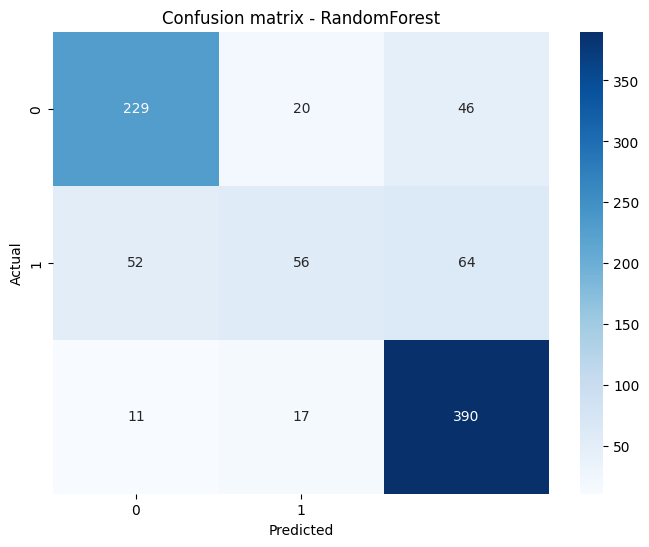

In [76]:
#sing confusion matrix to visulaize and summarize the performance
conf_matrix= confusion_matrix(y_test, predicted_rf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion matrix - RandomForest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

MODEL PREDICTION:
I tried classification as shown above only for comparism and deep analysis;

But i chose and made my prediction using classification but it gives a clear result. its pre
dicted the best result.


In [77]:
!pip install pypickle

In [78]:
import pypickle
filepath = 'Student.pkl'
pypickle.save(filepath, rf_classifier)

[pypickle] Pickle file saved: [Student.pkl]


True